In [ ]:
#code that analyzes the ligand core RMSDs of ligand poses from various docking parameters to the original co-crystal pose
#i.e. checking docking accuracy

In [1]:
import matplotlib.pyplot as plt

[12.86682013  7.03557735  1.34462769  5.77181302  1.30120102  5.43782232
  0.97568061]


([<matplotlib.axis.XTick at 0x7f5f3396a150>,
 [Text(0, 0, 'OE-AB'),
  Text(0, 0, 'SP-AB'),
  Text(0, 0, 'SP-AC'),
  Text(0, 0, 'XP-AB'),
  Text(0, 0, 'XP-AC'),
  Text(0, 0, 'SP-HB'),
  Text(0, 0, 'SP-HC')])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


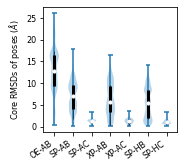

In [2]:
#code to compare ligand core RMSDs for a an aggregate of all poses for each docking type in violin plots
#This ends up being Figure 4C

import matplotlib as mplt
import numpy as np
font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)

#getting data from python scripts (<docking>_core_rmsd.py scripts) that calculated the ligand core RMSDs through Schrodinger's Python API
methods = ['XTAL','TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']
docktypes = ['OE','GLIDE_SP','GLIDE_SP_core','GLIDE_XP','GLIDE_XP_core','GLIDE_holo','GLIDE_holo_core'] 
all_rmsds = [] #list of lists of rmsds
for dock in docktypes:        
    rmsds = []
    for method in methods:
        with open('/home/jegan/pose_analysis/lig_core_rmsd/'+dock+'_docking/'+method+'_rmsd.csv','r') as datafile:
            datafile = datafile.readlines()
            for line in datafile[1:]:
                line = line.split(',')
                rmsds.append(float(line[3].rstrip()))
                
    all_rmsds.append(rmsds)
    
#violin plot
fig, ax = plt.subplots(1, 1, figsize = (2.4,2.3))
ax.violinplot(all_rmsds)

#boxplots on top of the violin plots
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

quartile1, medians, quartile3 = np.percentile(all_rmsds, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(all_rmsds, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=10, zorder=3)
print(medians)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)
ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=0.5)

#labeling and formatting
plt.ylabel('Core RMSDs of poses ('+r'$\AA$'+')', fontname = 'Arial', fontsize = 8)
ax.tick_params(labelsize=8)
ticks = range(1,8)
labels = ['OE-AB','SP-AB', 'SP-AC', 'XP-AB', 'XP-AC', 'SP-HB', 'SP-HC']
plt.xticks(ticks = ticks, labels = labels, fontsize = 8, rotation = 35, ha = 'right')

#plt.savefig('/home/jegan/pose_analysis/figs/avg_rmsds_violin_fig_5.png', dpi = 300, bbox_inches = 'tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


[4.97936557 6.35251608 8.14873546 8.49744419 8.6504089  5.39788376
 6.30025152]
[4.97936557 5.4525845  3.88689519 5.87256957 4.70975427 5.50594154
 5.97373743]
17.84756759088639


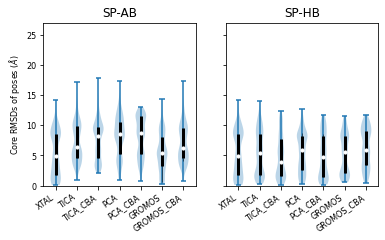

In [3]:
#code to compare rmsd from xtal core of apo docking types expanded out into clustering methods in violin plots, only SP-AB and SP-HB
#this ends up being Supplemental Fig 3

font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)

    
fig, ax = plt.subplots(1, 2, sharey = 'all', figsize = (6,3))
docktypes_apo = ['GLIDE_SP','GLIDE_holo'] 
methods = ['XTAL','TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']
labels = ['SP-AB','SP-HB']

all_rmsds = []

for x, docktype in zip(range(2), docktypes_apo):
    
    #getting data
    dock_rmsds = [] #list of lists of each method's rmsds (n = 459)
    for method in methods:
        rmsds = []
        with open('/home/jegan/pose_analysis/lig_core_rmsd/'+docktype+'_docking/'+method+'_rmsd.csv','r') as datafile:
            datafile = datafile.readlines()
            for line in datafile[1:]:
                line = line.split(',')
                rmsds.append(float(line[3].rstrip()))
                all_rmsds.append(float(line[3].rstrip()))
        dock_rmsds.append(rmsds)
    
    #violin plot
    ax[x].violinplot(dock_rmsds)

    #boxplots over the violin plots
    quartile1, medians, quartile3 = np.percentile(dock_rmsds, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(dock_rmsds, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax[x].scatter(inds, medians, marker='o', color='white', s=10, zorder=3)
    print(medians)
    ax[x].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)
    ax[x].vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=0.5)
    
    #formatting and labeling
    ax[x].tick_params(labelsize=8)
    ticks = range(1,8)
    ax[x].set_xticks(ticks) 
    ax[x].set_xticklabels(methods, fontsize=8, rotation = 35, ha = 'right')
    ax[x].title.set_text(labels[x])
    ax[x].set_ylim(0,27)

#labeling and formatting
ax[0].set_ylabel('Core RMSDs of poses ('+r'$\AA$'+')', fontname = 'Arial', fontsize = 8)
print(max(all_rmsds))
#plt.savefig('/home/jegan/pose_analysis/figs/rmsds_violin_fig_3.png', dpi = 300, bbox_inches = 'tight')

[ 9.39305877 12.22573555 11.56725817 12.54113753 16.12010301 15.35505858
 14.36832842]
[4.97936557 6.35251608 8.14873546 8.49744419 8.6504089  5.39788376
 6.30025152]
[0.81301994 1.33291304 1.62862166 1.3139852  1.42472717 1.25919013
 1.41114079]
[2.43022439 5.64510046 5.64510046 7.66606771 7.55469822 5.06998681
 6.83610756]
[0.69771321 1.41240575 1.62874594 1.5771807  1.38086498 1.04770669
 1.33993567]
26.229642950258096


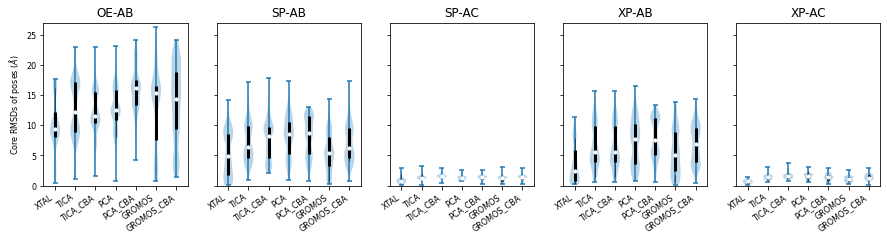

In [4]:
#code to compare ligand core RMSDs of apo docking types expanded out into clustering methods in violin plots

import matplotlib as mplt
import numpy as np
font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)
    
fig, ax = plt.subplots(1, 5, sharey = 'all', figsize = (15,3))
docktypes_apo = ['OE','GLIDE_SP','GLIDE_SP_core','GLIDE_XP','GLIDE_XP_core'] 
methods = ['XTAL','TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']

all_rmsds = []

for x, docktype in zip(range(5), docktypes_apo):
    
    #getting data
    dock_rmsds = [] #list of lists of each method's rmsds (n = 459)
    for method in methods:
        rmsds = []
        with open('/home/jegan/pose_analysis/lig_core_rmsd/'+docktype+'_docking/'+method+'_rmsd.csv','r') as datafile:
            datafile = datafile.readlines()
            for line in datafile[1:]:
                line = line.split(',')
                rmsds.append(float(line[3].rstrip()))
                all_rmsds.append(float(line[3].rstrip()))
        dock_rmsds.append(rmsds)
    
    #violin plot
    ax[x].violinplot(dock_rmsds)

    #boxplots over the violin plots
    quartile1, medians, quartile3 = np.percentile(dock_rmsds, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(dock_rmsds, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax[x].scatter(inds, medians, marker='o', color='white', s=10, zorder=3)
    print(medians)
    ax[x].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)
    ax[x].vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=0.5)
    
    #formatting and labeling
    ax[x].tick_params(labelsize=8)
    ticks = range(1,8)
    ax[x].set_xticks(ticks) 
    ax[x].set_xticklabels(methods, fontsize=8, rotation = 35, ha = 'right')
    labels = ['OE-AB','SP-AB', 'SP-AC', 'XP-AB', 'XP-AC']
    ax[x].title.set_text(labels[x])
    ax[x].set_ylim(0,27)

#labeling and formatting
ax[0].set_ylabel('Core RMSDs of poses ('+r'$\AA$'+')', fontname = 'Arial', fontsize = 8)
print(max(all_rmsds))
#plt.savefig('/home/jegan/pose_analysis/figs/rmsds_apo_violin_fig_1.png', dpi = 300, bbox_inches = 'tight')

[4.97936557 5.4525845  3.88689519 5.87256957 4.70975427 5.50594154
 5.97373743]
[0.81301994 1.04529613 1.03623552 1.07778058 0.9816661  0.99134269
 0.84652622]


Text(0, 0.5, 'Core RMSDs of poses ($\\AA$)')

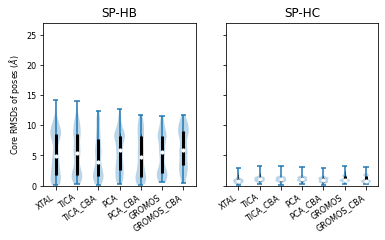

In [5]:
#code to compare rmsd from xtal core of holo docking types expanded out into clustering methods in violin plots

import matplotlib as mplt
import numpy as np
font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)
    
fig, ax = plt.subplots(1, 2, sharey = 'all', figsize = (6,3))
docktypes_holo = ['GLIDE_holo','GLIDE_holo_core'] 
methods = ['XTAL','TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']

for x, docktype in zip(range(2), docktypes_holo):
    
    #getting data
    dock_rmsds = [] #list of lists of each method's rmsds (n = 459)
    for method in methods:
        rmsds = []
        with open('/home/jegan/pose_analysis/lig_core_rmsd/'+docktype+'_docking/'+method+'_rmsd.csv','r') as datafile:
            datafile = datafile.readlines()
            for line in datafile[1:]:
                line = line.split(',')
                rmsds.append(float(line[3].rstrip()))  
        dock_rmsds.append(rmsds)
    
    #violin plot
    ax[x].violinplot(dock_rmsds)

    #boxplots over the violin plots
    quartile1, medians, quartile3 = np.percentile(dock_rmsds, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(dock_rmsds, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax[x].scatter(inds, medians, marker='o', color='white', s=10, zorder=3)
    print(medians)
    ax[x].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)
    ax[x].vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=0.5)
    
    #formatting and labeling
    ax[x].tick_params(labelsize=8)
    ticks = range(1,8)
    ax[x].set_xticks(ticks) 
    ax[x].set_xticklabels(methods, fontsize=8, rotation = 35, ha = 'right')
    ax[x].set_ylim(0,27)
    labels = ['SP-HB', 'SP-HC']
    ax[x].title.set_text(labels[x])
    
#labeling and formatting
ax[0].set_ylabel('Core RMSDs of poses ('+r'$\AA$'+')', fontname = 'Arial', fontsize = 8)
    
#plt.savefig('/home/jegan/pose_analysis/figs/rmsds_holo_violin_fig_1.png', dpi = 300, bbox_inches = 'tight')

[9.39305877 4.97936557 0.81301994 2.43022439 0.69771321]


([<matplotlib.axis.XTick at 0x7f5f2c1e0b10>,
 [Text(0, 0, 'OE-AB'),
  Text(0, 0, 'SP-AB'),
  Text(0, 0, 'SP-AC'),
  Text(0, 0, 'XP-AB'),
  Text(0, 0, 'XP-AC')])

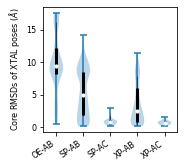

In [6]:
#code to compare rmsd from xtal core of various docking types in violin plots for the xtal structures alone

import matplotlib as mplt
import numpy as np
font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)

#getting data
docktypes = ['OE','GLIDE_SP','GLIDE_SP_core','GLIDE_XP','GLIDE_XP_core'] 
all_rmsds = [] #list of lists of rmsds
for dock in docktypes:        
    rmsds = []
    with open('/home/jegan/pose_analysis/lig_core_rmsd/'+dock+'_docking/XTAL_rmsd.csv','r') as datafile:
        datafile = datafile.readlines()
        for line in datafile[1:]:
            line = line.split(',')
            rmsds.append(float(line[3].rstrip()))
                
    all_rmsds.append(rmsds)
    
#violin plot
fig, ax = plt.subplots(1, 1, figsize = (2.4,2.3))
ax.violinplot(all_rmsds)

quartile1, medians, quartile3 = np.percentile(all_rmsds, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(all_rmsds, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=10, zorder=3)
print(medians)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)
ax.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=0.5)

#labeling and formatting
plt.ylabel('Core RMSDs of XTAL poses ('+r'$\AA$'+')', fontname = 'Arial', fontsize = 8)
ax.tick_params(labelsize=8)
ticks = range(1,6)
labels = ['OE-AB','SP-AB', 'SP-AC', 'XP-AB', 'XP-AC']
plt.xticks(ticks = ticks, labels = labels, fontsize = 8, rotation = 35, ha = 'right')

#plt.savefig('/home/jegan/pose_analysis/figs/xtal_rmsds_violin_fig_1.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
#extra interesting analyses that came from the Schrodinger API that may be interesting in terms of ligand interactions, e.g. hydrogen bonding, pipi interactions, etc.

Text(0.05, 0.5, '# of Total aggregate Interactions')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


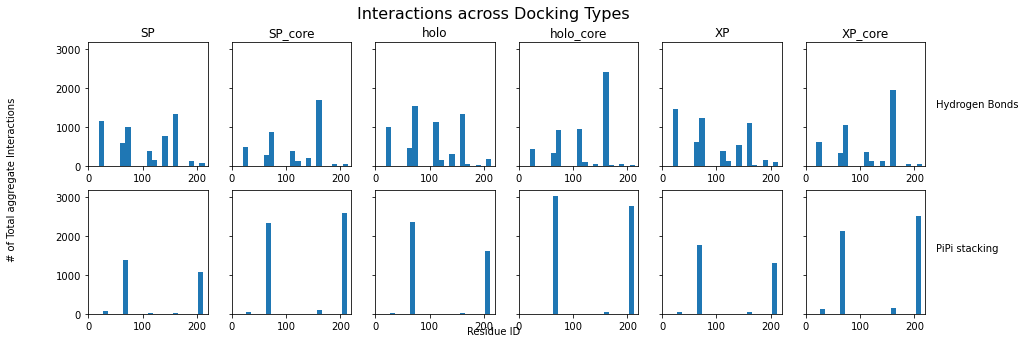

In [7]:

#code to compare different types of interactions between clusters and methods of the holo md constrained SP docking
methods = ['TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']
contact_types = ['hbond', 'pipi'] #turns out we have like no pi cation interactions so they're just not very interesting
docktypes = ['SP','SP_core','holo','holo_core','XP','XP_core'] # I haven't finished the XP regular docking yet

fig, ax = plt.subplots(2, 6, sharey='all', figsize = (15,5))

for docktype,y in zip(docktypes,range(6)):
    for contact,x in zip(contact_types,range(2)):
        
        resids = []
        for method in methods:
            with open('/home/jegan/pose_analysis/pv_interactions/GLIDE_'+docktype+'_docking/'+method+'_inter.csv','r') as datafile:
                datafile = datafile.readlines()
                for line in datafile[1:]:
                    line = line.split(',')

                    if line[3] == contact:
                        res = line[4]
                        resid = res[2:]
                        resids.append(int(resid))

        ax[x,y].hist(resids, bins = 20)
        ax[x,y].set_xlim(0,220)

for a in range(6):
    ax[0,a].title.set_text(docktypes[a])

fig.suptitle('Interactions across Docking Types',fontsize = 16)
fig.text(0.91,0.7,'Hydrogen Bonds')
fig.text(0.91,0.3,'PiPi stacking')
fig.text(0.5, 0.07, 'Residue ID', ha = 'center')
fig.text(0.05, 0.5, "# of Total aggregate Interactions", va = 'center', rotation='vertical')

#plt.savefig('/home/jegan/pose_analysis/figs/all_docking_inters.png', bbox_inches = 'tight')

Text(0.08, 0.5, 'Number of Ligands with the Interaction Present')

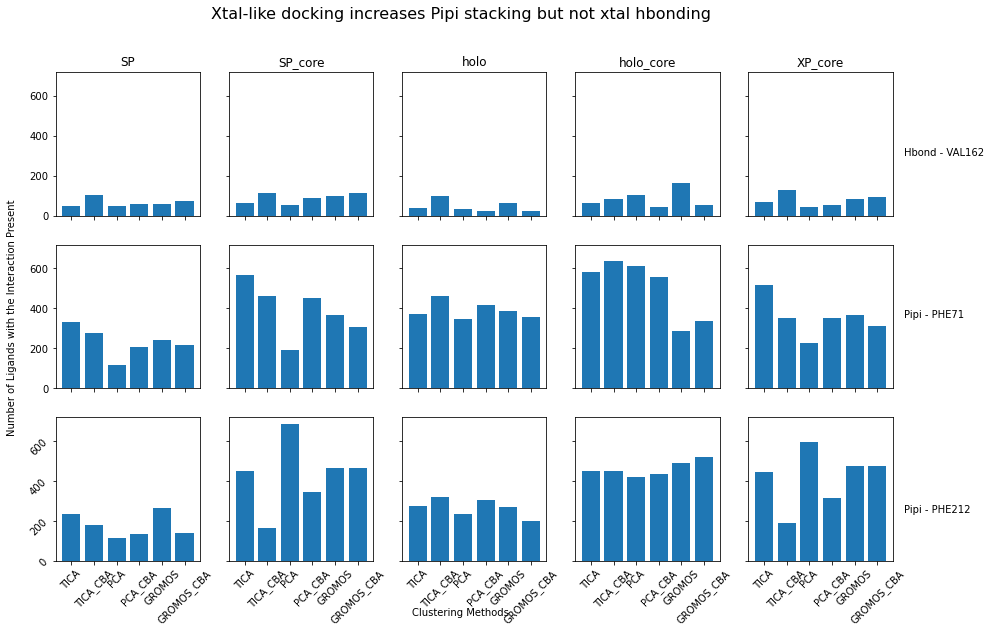

In [8]:
#code to investigate crystal structure interactions (hbond with ASP164 and pipi interactions with phe71 and 212) in the docked poses

methods = ['TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']
contact_types = ['hbond', 'pipi','pipi'] #turns out we have like no pi cation interactions so they're just not very interesting
residues = ['A:162','A:71', 'A:212']
docktypes = ['SP','SP_core','holo','holo_core','XP_core'] # I haven't finished the XP regular docking yet

fig, ax = plt.subplots(3, 5, sharey='all', sharex = 'all', figsize = (15,9))

for docktype,y in zip(docktypes,range(6)):
    for contact,residue,x in zip(contact_types,residues,range(3)):
        
        tot_ligs = []
        for method in methods:
            num_ligs = 0
            with open('/home/jegan/pose_analysis/pv_interactions/GLIDE_'+docktype+'_docking/'+method+'_inter.csv','r') as datafile:
                datafile = datafile.readlines()
                for line in datafile[1:]:
                    line = line.split(',')

                    if line[3] == contact:
                        if line[4] == residue:
                            num_ligs += 1
            tot_ligs.append(num_ligs)

        ax[x,y].bar(methods, tot_ligs)
        #ax[x,y].set_xlim(0,220)
        #ax[x,y].set_ylim(0,700)

for a in range(5):
    ax[0,a].title.set_text(docktypes[a])
    ax[2,a].tick_params(labelrotation=45)

fig.suptitle('Xtal-like docking increases Pipi stacking but not xtal hbonding',fontsize = 16)
fig.text(0.91,0.75,'Hbond - VAL162')
fig.text(0.91,0.5,'Pipi - PHE71')
fig.text(0.91,0.2,'Pipi - PHE212')
fig.text(0.5, 0.04, 'Clustering Methods', ha = 'center')
fig.text(0.08, 0.5, "Number of Ligands with the Interaction Present", va = 'center', rotation='vertical')

#plt.savefig('/home/jegan/pose_analysis/figs/xtal_inters.png', bbox_inches = 'tight')

In [ ]:
###############################################################################################################################



########### Now looking at rmsd of cores from the xtal structure ##################################################################################



##################################################################################################

Text(0.05, 0.5, '# of Ligands')

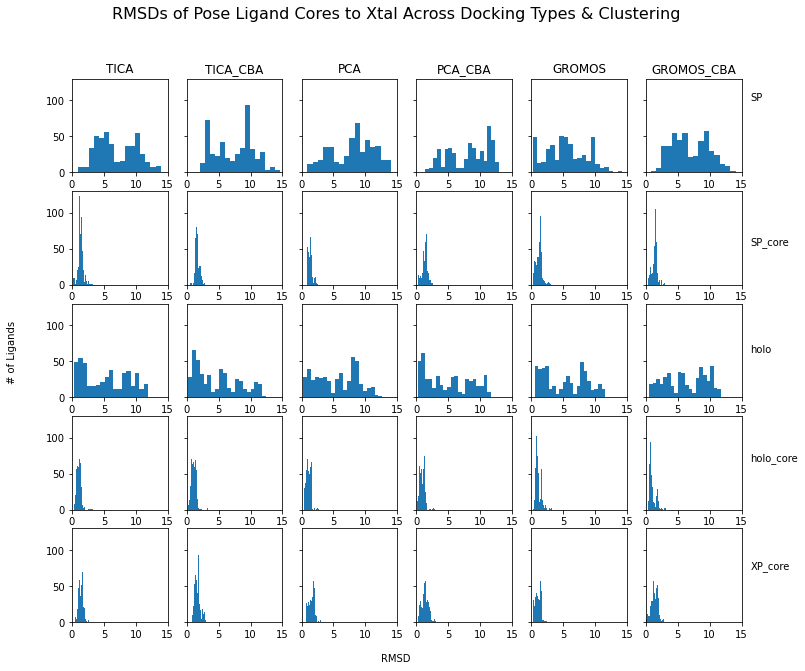

In [9]:
#code to compare rmsd from xtal core of various docking types in histograms
methods = ['TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']
docktypes = ['SP','SP_core','holo','holo_core','XP_core'] # I haven't finished the XP regular docking yet

fig, ax = plt.subplots(5, 6, sharey='all', figsize = (12,10))

for method,y in zip(methods,range(6)):
    for docktype,x in zip(docktypes,range(5)):
        
        rmsds = []
        with open('/home/jegan/pose_analysis/lig_core_rmsd/GLIDE_'+docktype+'_docking/'+method+'_rmsd.csv','r') as datafile:
            datafile = datafile.readlines()
            for line in datafile[1:]:
                line = line.split(',')
                rmsds.append(float(line[3].rstrip()))

        ax[x,y].hist(rmsds, bins = 20)
        ax[x,y].set_xlim(0,15)
        #ax[x,y].set_ylim(0,700)

fig.suptitle('RMSDs of Pose Ligand Cores to Xtal Across Docking Types & Clustering',fontsize = 16)
for a in range(6):
    ax[0,a].title.set_text(methods[a])
    
nums = [0.85, 0.65, 0.5, 0.35, 0.2]
for num,dock in zip(nums,docktypes):
    fig.text(0.91,num,dock)

fig.text(0.5, 0.07, 'RMSD', ha = 'center')
fig.text(0.05, 0.5, "# of Ligands", va = 'center', rotation='vertical')

#plt.savefig('/home/jegan/pose_analysis/figs/hist_rmsds.png', bbox_inches = 'tight')

Text(0.1, 0.5, 'Ktau')

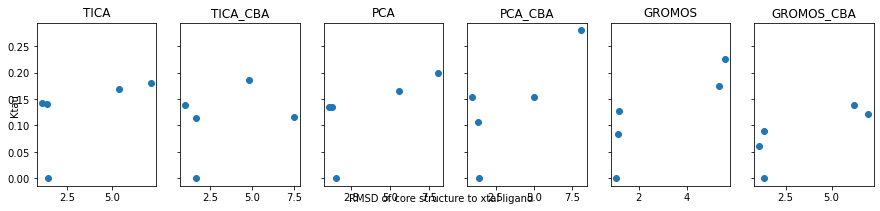

In [65]:
#code to compare rmsd from xtal core of various docking types in histograms
methods = ['TICA','TICA_CBA','PCA','PCA_CBA','GROMOS','GROMOS_CBA']
docktypes = ['SP','SP_core','holo','holo_core','XP_core'] # I haven't finished the XP regular docking yet

fig, ax = plt.subplots(1, 6, sharey='all', figsize = (15,3))

for method,y in zip(methods,range(6)):
    avg_rmsds = []
    ktaus = []
    for dock,ind in zip(docktypes,range(1,6)):
        rmsds = []
        with open('/home/jegan/pose_analysis/lig_core_rmsd/GLIDE_'+dock+'_docking/'+method+'_rmsd.csv','r') as datafile:
            datafile = datafile.readlines()
            for line in datafile[1:]:
                line = line.split(',')
                rmsds.append(float(line[3].rstrip()))

        avg_rmsd = sum(rmsds)/len(rmsds)
        avg_rmsds.append(avg_rmsd)
        
        #some kind of way to get the ktau
        
        with open('/home/jegan/final_centroids/csvs/GLIDE_methods_min_taus.txt','r') as datafile:
            lines = datafile.readlines()
            
            for line in lines[2:]:
                line = line.split(',')
                if line[0] == method:
                    ktaus.append(float(line[ind].rstrip()))
        
        
        
    ax[y].scatter(avg_rmsds,ktaus)
    
    
for a in range(6):
    ax[a].title.set_text(methods[a])

#fig.suptitle('RMSDs of Pose Ligand Cores to Xtal Across Docking Types & Clustering',fontsize = 16)
fig.text(0.5, 0.05, 'RMSD of core structure to xtal ligand', ha = 'center')
fig.text(0.1, 0.5, 'Ktau', va = 'center', rotation='vertical')

#plt.savefig('/home/jegan/pose_analysis/figs/scatter_rmsds.png', bbox_inches = 'tight')